In [7]:
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.python.keras.utils import np_utils
from keras.models import Sequential
from keras.utils import array_to_img, img_to_array, load_img
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# 데이터 경로 설정
train_data_dir = "/content/drive/MyDrive/font_train_test_9/train"
test_data_dir = "/content/drive/MyDrive/font_train_test_9/test"

image_size = (28, 28)
batch_size = 32

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 29079 images belonging to 9 classes.


In [12]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 30168 images belonging to 9 classes.


In [13]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
results = model.fit(train_generator,
          steps_per_epoch=40,
          epochs=10)

Epoch 1/10
40/40 [==============================] - 177s 4s/step - loss: 0.4381 - accuracy: 0.8594
Epoch 2/10
40/40 [==============================] - 173s 4s/step - loss: 0.4076 - accuracy: 0.8680
Epoch 3/10
40/40 [==============================] - 172s 4s/step - loss: 0.3381 - accuracy: 0.8867
Epoch 4/10
40/40 [==============================] - 163s 4s/step - loss: 0.3183 - accuracy: 0.8906
Epoch 5/10
40/40 [==============================] - 155s 4s/step - loss: 0.3208 - accuracy: 0.8797
Epoch 6/10
40/40 [==============================] - 150s 4s/step - loss: 0.2833 - accuracy: 0.8992
Epoch 7/10
40/40 [==============================] - 132s 3s/step - loss: 0.2515 - accuracy: 0.9164
Epoch 8/10
40/40 [==============================] - 136s 3s/step - loss: 0.2482 - accuracy: 0.9195
Epoch 9/10
40/40 [==============================] - 130s 3s/step - loss: 0.2236 - accuracy: 0.9273
Epoch 10/10
40/40 [==============================] - 125s 3s/step - loss: 0.2413 - accuracy: 0.9086


In [16]:
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

f1 = f1_score(y_true, y_pred, average='weighted')
print(f"F1-score: {f1}")

print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))


943/943 [==============================] - 7088s 8s/step
F1-score: 0.08901513818928607
              precision    recall  f1-score   support

           0       0.11      0.10      0.11      3352
           1       0.11      0.14      0.12      3352
           2       0.11      0.16      0.13      3352
           3       0.11      0.28      0.16      3352
           4       0.12      0.20      0.15      3352
           5       0.00      0.00      0.00      3352
           6       0.11      0.16      0.13      3352
           7       0.00      0.00      0.00      3352
           8       0.00      0.00      0.00      3352

    accuracy                           0.11     30168
   macro avg       0.08      0.11      0.09     30168
weighted avg       0.08      0.11      0.09     30168

[[327 446 567 882 621   0 509   0   0]
 [315 458 552 891 609   0 527   0   0]
 [324 457 533 943 582   0 513   0   0]
 [290 457 532 934 578   0 561   0   0]
 [351 443 531 872 665   0 490   0   0]
 [317 473 557

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


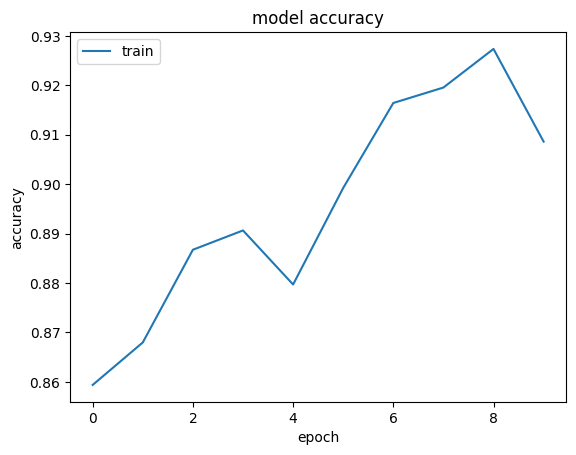

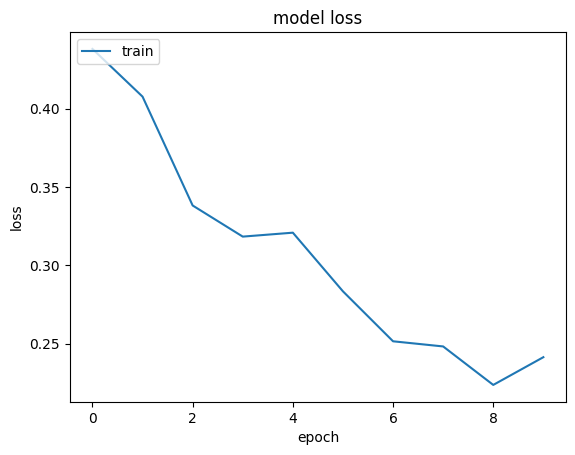

In [18]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
testGenSet = testDataGen.flow_from_directory(
    test_dir,
    batch_size=64,
    target_size=(28,28),
    class_mode='categorical'
)

Found 30168 images belonging to 9 classes.


In [ ]:
# 모델 구성
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape=(28,28,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
results = model.fit(
    trainGenSet,
    epochs=100,
    steps_per_epoch=100,
    validation_data=valGenSet,
    validation_steps=120
)

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 0.8569 - accuracy: 0.6172 

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))